In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [51]:
import cv2 as cv

img1 = cv.imread(r'C:\basedata\train\certificates\1.jpeg',cv.IMREAD_COLOR)
img2 = cv.imread(r'C:\basedata\train\aadhar\1.jpeg',cv.IMREAD_COLOR)
img3 = cv.imread(r'C:\basedata\train\IDs\1.jpeg',cv.IMREAD_COLOR)
img4 = cv.imread(r'C:\basedata\train\passbook\2.jpeg',cv.IMREAD_COLOR)
img5 = cv.imread(r'C:\basedata\train\aadhar\2.jpeg',cv.IMREAD_COLOR)

img1 = cv.resize(img1,(350,600))
img2 = cv.resize(img2,(500,200))
img3 = cv.resize(img3,(350,600))
img4 = cv.resize(img4,(500,200))
img5 = cv.resize(img5,(500,200))

cv.imshow('Image window',img1)
cv.imshow('Image window',img2)
cv.imshow('Image window',img3)
cv.imshow('Image window',img4)
cv.imshow('Image window',img5)

cv.waitKey(0)

cv.destroyAllWindows()


In [7]:
import cv2
cv2.imread(r'C:\basedata\train\certificates\1.jpeg').shape
cv2.imread(r'C:\basedata\train\aadhar\1.jpeg').shape
cv2.imread(r'C:\basedata\train\IDs\1.jpeg').shape
cv2.imread(r'C:\basedata\train\passbook\2.jpeg').shape
cv2.imread(r'C:\basedata\train\aadhar\2.jpeg').shape

(490, 719, 3)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train = ImageDataGenerator(rescale = 1/255)
validation =  ImageDataGenerator(rescale = 1/255)

In [24]:
train_dataset = train.flow_from_directory(r'C:\basedata\train',
                                         target_size=(200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')
validation_dataset = train.flow_from_directory(r'C:\basedata\validation',
                                         target_size=(200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')

Found 23 images belonging to 4 classes.
Found 0 images belonging to 4 classes.


In [25]:
train_dataset.classes

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
       3])

In [28]:
import tensorflow as tf
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense 
from tensorflow.python.keras.layers import Dropout

model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   
                                   tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   
                                   tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   
                                   tf.keras.layers.Flatten(),
                                   
                                   tf.keras.layers.Dense(512,activation = 'relu'),
                                   
                                   tf.keras.layers.Dense(1,activation = 'sigmoid')
                                   ])

In [29]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss= 'binary_crossentropy',
             optimizer = RMSprop(learning_rate=0.001),
             metrics =['accuracy'])

In [37]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 3,
                     epochs= 10,
                     validation_data= validation_dataset)

Epoch 1/10
3/3 [==============================] - 2s 370ms/step - loss: -29.3111 - accuracy: 0.2917
Epoch 2/10
3/3 [==============================] - 1s 376ms/step - loss: -1455.7787 - accuracy: 0.3889
Epoch 3/10
3/3 [==============================] - 1s 387ms/step - loss: -3502.7498 - accuracy: 0.4750
Epoch 4/10
3/3 [==============================] - 1s 354ms/step - loss: -28490.4795 - accuracy: 0.1667
Epoch 5/10
3/3 [==============================] - 1s 357ms/step - loss: -18470.3967 - accuracy: 0.3208
Epoch 6/10
3/3 [==============================] - 1s 381ms/step - loss: 12295.3187 - accuracy: 0.3889
Epoch 7/10
3/3 [==============================] - 1s 379ms/step - loss: -17095.3149 - accuracy: 0.4583
Epoch 8/10
3/3 [==============================] - 1s 367ms/step - loss: -24244.4255 - accuracy: 0.2917
Epoch 9/10
3/3 [==============================] - 1s 397ms/step - loss: -44367.3301 - accuracy: 0.3611
Epoch 10/10
3/3 [==============================] - 1s 409ms/step - loss: -78712

In [15]:
import os
import matplotlib.pyplot as plt
dir_path = r'C:\basedata\train'
for y in os.listdir(dir_path):
    print(y)
    plt.show()

aadhar
certificates
IDs
passbook


In [53]:
import os
import cv2 as cv
import matplotlib.pyplot as plt
dir_path = r'C:\basedata\train'
for y in os.listdir(dir_path):
    print(y)
    
img1 = cv.resize(img1,(350,600))
img2 = cv.resize(img2,(500,300))
img3 = cv.resize(img3,(500,300))
img4 = cv.resize(img4,(500,200))
img5 = cv.resize(img5,(500,200))
    
cv.imshow('certificate',img1)
cv.imshow('aadhar',img2)
cv.imshow('IDs',img3)
cv.imshow('passbook',img4)
cv.imshow('aadhar/2',img5)

cv.waitKey(0)

cv.destroyAllWindows()


aadhar
certificates
IDs
passbook


1.jpeg


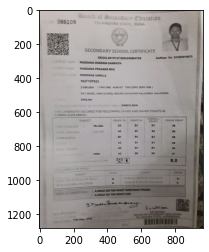

2.jpeg


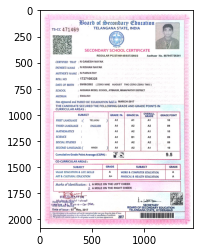

3.jpeg


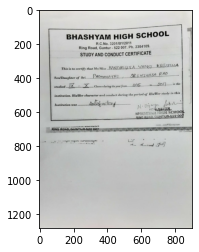

4.jpeg


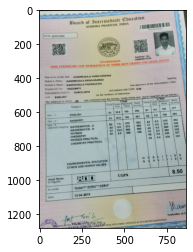

5.jpeg


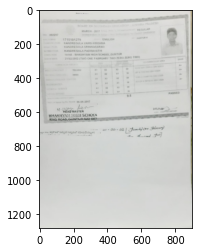

6.jpeg


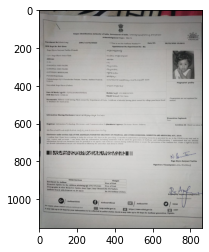

7.jpeg


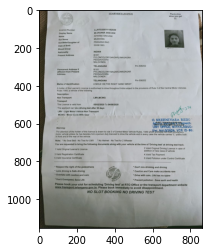

8.jpeg


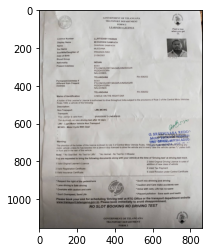

In [47]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
dir_path = r'C:\basedata\train\certificates'
for y in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+ y)
    print(y)
    plt.imshow(img)
    plt.show()
    